# Exploratory data analysis (EDA)

Importing necessary modules and Reading Train and Test.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
iris = pd.read_csv("Train.csv")

In [3]:
data = pd.read_csv("Test.csv")

Getting shape of Both Train and Test data.

In [4]:
# (Q) how many data-points and features?
print (iris.shape)

(6034195, 4)


In [5]:
print(data.shape)

(2013337, 3)


Columns in Train data 

In [6]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')


Taking 50 % of data

In [8]:
train = iris.head(int(len(iris)*(50/100)))

In [9]:
test = data.head(int(len(data)*(50/100)))

In [10]:
train.shape

(3017097, 4)

Droping Null values

In [11]:
train.isnull().sum()

Id       0
Title    0
Body     0
Tags     5
dtype: int64

In [12]:
train.dropna()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
...,...,...,...,...
3017092,3017093,Passing a derived class to a web service metho...,<p>I have a bizarre problem that is doing my h...,c# web-services abstract-class
3017093,3017094,What's the real point and benefit of having an...,<p>When reading the apple docs about multithre...,iphone multithreading
3017094,3017095,Sitefinity 4.2 - Unable to load one or more of...,<p>I am trying to pull up a Sitefinity 4.2 pro...,sitefinity-4
3017095,3017096,Provide a progress bar with a custom text and ...,<p>I have a C++ framework and I would like to ...,cocoa progress-bar


Tags count.

In [13]:

train["Tags"].value_counts()


android                             24870
php                                 15254
jquery                              13921
javascript                          12605
javascript jquery                   12528
                                    ...  
comparison order multi-language         1
java android sqlite table flags         1
.net c++ visual-c++ com                 1
javascript url parameters tweets        1
drupal recipe custom-pages              1
Name: Tags, Length: 1352154, dtype: int64

Due to Lack of computational power ,Here we are only considering tags which are occuring in atleast 500 questions.

In [14]:
trainns = train.groupby('Tags').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of Tags=>',len(trainns['Tags'].unique()))

Number of Tags=> 228


In [14]:
trainns

,Id,Title,Body,Tags
0,15,Can I stop windows 7 from fading windows on al...,<p>When you hit alt tab on windows 7 and stop ...,windows-7
1,26,Can i use printf in IO monad?,<p>The stopLoss function causes the following ...,haskell
2,41,implementing Static library in New iphone App,<p>I have created a static library libTest.a.<...,iphone xcode
3,54,How to tell emacs to open .h file in C++ mode?,<p>What lines should I add to my _emacs (on Wi...,emacs
4,57,"<textarea/> tag ""swallows"" html",<p>This is a very strange problem I've been st...,html
...,...,...,...,...
393081,3017057,Parse Spanish characters in Objective-C using ...,<p>I am using NSXmlParser</p>\n\n<p>I fetch al...,objective-c
393082,3017069,jquery pictures to same page popup,"<p>first time posting here, though have follow...",jquery html css
393083,3017077,html input button on a table doesn't call any ...,<p>I have a table</p>\n\n<pre><code>&lt;table ...,javascript jquery html
393084,3017087,Check two drawable images,<p>All</p>\n\n<p>I have created frame animatio...,android


In [16]:
train['Tags'].unique()

array(['php image-processing file-upload upload mime-types', 'firefox',
       'r matlab machine-learning', ...,
       'javascript android jquery ios touch', 'cocoa progress-bar',
       'php html post header'], dtype=object)

In [19]:
trainns['name']=trainns['Tags'].apply(lambda x:x.split(' ')[0]) 

In [21]:
trainns

,Id,Title,Body,Tags,name
0,15,Can I stop windows 7 from fading windows on al...,<p>When you hit alt tab on windows 7 and stop ...,windows-7,windows-7
1,26,Can i use printf in IO monad?,<p>The stopLoss function causes the following ...,haskell,haskell
2,41,implementing Static library in New iphone App,<p>I have created a static library libTest.a.<...,iphone xcode,iphone
3,54,How to tell emacs to open .h file in C++ mode?,<p>What lines should I add to my _emacs (on Wi...,emacs,emacs
4,57,"<textarea/> tag ""swallows"" html",<p>This is a very strange problem I've been st...,html,html
...,...,...,...,...,...
393081,3017057,Parse Spanish characters in Objective-C using ...,<p>I am using NSXmlParser</p>\n\n<p>I fetch al...,objective-c,objective-c
393082,3017069,jquery pictures to same page popup,"<p>first time posting here, though have follow...",jquery html css,jquery
393083,3017077,html input button on a table doesn't call any ...,<p>I have a table</p>\n\n<pre><code>&lt;table ...,javascript jquery html,javascript
393084,3017087,Check two drawable images,<p>All</p>\n\n<p>I have created frame animatio...,android,android


In [94]:
for index,text in enumerate(trainns['Title'][35:40]):
  print('Title %d:\n'%(index+1),text)

Title 1:
 CSS hover change other class
Title 2:
 UNIX_TIMESTAMP in SQL Server
Title 3:
 Add items in a list/sequence in Clojure
Title 4:
 Simple REGEX - How to get all lines beginning with "|" - [Pipeline] to the line above ending with [Pipeline]
Title 5:
 Accessing localhost of PC from USB connected Android mobile device


Expanding Contractions

In [25]:
import re
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
trainns['Title']=trainns['Title'].apply(lambda x:expand_contractions(x))

Removing Html Tags

In [27]:

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
trainns['Body']=trainns['Body'].apply(lambda x:remove_tags(x))

In [35]:
trainns['Body']

0         When you hit alt tab on windows 7 and stop for...
1         The stopLoss function causes the following err...
2         I have created a static library libTest.a.i am...
3         What lines should I add to my _emacs (on Windo...
4         This is a very strange problem I have been str...
                                ...                        
393081    I am using NSXmlParserI fetch all the data fro...
393082    first time posting here, though have followed ...
393083    I have a table&lt;table style="width: 100%;" c...
393084    AllI have created frame animation using Animat...
393085    I am a little new to PHP and I am not sure if ...
Name: Body, Length: 393086, dtype: object

Expanding Contractions

In [32]:
trainns['Body']=trainns['Body'].apply(lambda x:x.replace("\n", ""))

In [34]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
trainns['Body']=trainns['Body'].apply(lambda x:expand_contractions(x))

 Converting Body and Title to lower case

In [36]:
trainns['cleanedTitle']=trainns['Title'].apply(lambda x: x.lower())
trainns['cleanedBody']=trainns['Body'].apply(lambda x: x.lower())

Removing Punctuations

In [39]:
import string
trainns['cleanedTitle']=trainns['cleanedTitle'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
trainns['cleanedBody']=trainns['cleanedBody'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Removing extra space

In [40]:

trainns['cleanedTitle']=trainns['cleanedTitle'].apply(lambda x: re.sub(' +',' ',x))
trainns['cleanedBody']=trainns['cleanedBody'].apply(lambda x: re.sub(' +',' ',x))

In [95]:
for index,text in enumerate(trainns['cleanedTitle'][35:40]):
  print('Title %d:\n'%(index+1),text)

Title 1:
 css hover change other class
Title 2:
 unixtimestamp in sql server
Title 3:
 add items in a listsequence in clojure
Title 4:
 simple regex how to get all lines beginning with pipeline to the line above ending with pipeline
Title 5:
 accessing localhost of pc from usb connected android mobile device


In [96]:
for index,text in enumerate(trainns['cleanedBody'][35:40]):
  print('Body %d:\n'%(index+1),text)

Body 1:
 is there a way to change the class of an other object when i hover over an objecta menuitem has to change when i hover over the submenui haveulmenu menulink padding0px 13px 0px height23px fontweightbold widthautoulmenu ul lihover menulink color002d36 backgroundimagenone backgroundcolorffffffhtmlltul classmenu idmenugt ltligt lta href classmenulinkgtltspangtmain menu itemltspangtltagt ltulgt ltligtlta hrefgtlinkltagtltligt ltligtlta hrefgtlinkltagtltligt ltligtlta hrefgtlinkltagtltligt ltulgt ltligtltulgti also tried jquery ulmenu ul limouseoverfunction menulinkcsscolor 002d36 menulinkcssbackgroundcolor ffffff ulmenu ul limouseoutfunction menulinkcsscolor menulinkcssbackgroundcolor but that changes the other main menu items aswellanyone knows howthanks in advance
Body 2:
 i need to create a function in sql server 2008 that will mimic mysql is unixtimestamp any help will be appreciatedthanks in advance 
Body 3:
 there has to be a simple way to do this and i am obviously missing 

Removing Stop words and Lemmatization for Title and Body

In [46]:
import spacy
from spacy.lang.en.examples import sentences

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
trainns['lemmatizedTitle']=trainns['cleanedTitle'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [47]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
trainns['lemmatizedBody']=trainns['cleanedBody'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [49]:
df_grouped=trainns[['Tags','lemmatizedTitle','lemmatizedBody']].groupby(by='Tags').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatizedTitle,lemmatizedBody
Tags,,
.htaccess,assign file extension particular parser htacce...,suppose want file name myexcellentpage parse p...
.htaccess mod-rewrite,htaccess modrewrite rewriterule category modre...,want httpwwwmywebsitecomcd2012legal httpwwwmyw...
.net,unable detect net 35 net 20 instal net 40 vs20...,application require net 20 35 run instal vs 20...
abstract-algebra,set function form monoid gaussian prime p equi...,understand monoid sure set function compositio...
abstract-algebra group-theory,problem group theory psylow subgroup normalize...,let g group integer ngt 1 abnan bn abin g 1 gn...


In [50]:
df_groupeds=trainns[['name','lemmatizedTitle','lemmatizedBody']].groupby(by='name').agg(lambda x:' '.join(x))
df_groupeds.head()

,lemmatizedTitle,lemmatizedBody
name,,
.htaccess,htaccess modrewrite rewriterule category assig...,want httpwwwmywebsitecomcd2012legal httpwwwmyw...
.net,unable detect net 35 net 20 instal net 40 vs20...,application require net 20 35 run instal vs 20...
abstract-algebra,problem group theory set function form monoid ...,let g group integer ngt 1 abnan bn abin g 1 gn...
actionscript-3,as3 thumbnail generator box2d flash compile ex...,movieclip 10 frame photo 1024x768 px frame ild...
algebra-precalculus,positive integer p q r exist question universa...,positive integer p q r exist satisfy relation ...


 Creating Bag of word for Title column

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatizedTitle'])
df_dtmx = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtmx.index=df_grouped.index
df_dtmx.head(3)

,00,000,0000,00000,000000,00000000,000000000,000000000000,0000000000000000000000000000000000000000,0000012,...,сс,тhought,أقول,سایت,همسریابی,ℤnℤ,ℤr,ℤsubset,ﬁeld,ﬂight
Tags,,,,,,,,,,,,,,,,,,,,,
.htaccess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.htaccess mod-rewrite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.net,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 Creating Bag of Words for Body column

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatizedBody'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,00,000,0000,00000,000000,0000000,00000000,000000000,0000000000,00000000000,...,ﬁtte,ﬁx,ﬁxe,ﬁxed,ﬂight,ﬂno,ﬂy,３i,ｉam,ﾒi
Tags,,,,,,,,,,,,,,,,,,,,,
.htaccess,0,0,132,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.htaccess mod-rewrite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.net,1,1,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 Creating word cloud for every Tags in Body

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

 Creating Tag Count column

In [78]:
trainns['count'] = trainns["Tags"].apply(lambda x: len(x.split(" ")))


In [79]:
trainns.head()

,Id,Title,Body,Tags,name,cleanedTitle,cleanedBody,lemmatizedTitle,lemmatizedBody,polarityTitle,polarityBody,count
0,15,Can I stop windows 7 from fading windows on al...,When you hit alt tab on windows 7 and stop for...,windows-7,windows-7,can i stop windows 7 from fading windows on al...,when you hit alt tab on windows 7 and stop for...,stop window 7 fade window alttab,hit alt tab windows 7 stop second window hide ...,0.000000,0.088889,1
1,26,Can i use printf in IO monad?,The stopLoss function causes the following err...,haskell,haskell,can i use printf in io monad,the stoploss function causes the following err...,use printf io monad,stoploss function cause follow errorcould dedu...,0.000000,0.000000,1
2,41,implementing Static library in New iphone App,I have created a static library libTest.a.i am...,iphone xcode,iphone,implementing static library in new iphone app,i have created a static library libtestai am a...,implement static library new iphone app,create static library libtestai add library ne...,0.318182,0.351010,2
3,54,How to tell emacs to open .h file in C++ mode?,What lines should I add to my _emacs (on Windo...,emacs,emacs,how to tell emacs to open h file in c mode,what lines should i add to my emacs on windows...,tell emac open h file c mode,line add emac window file open h file c mode d...,0.000000,0.000000,1
4,57,"<textarea/> tag ""swallows"" html",This is a very strange problem I have been str...,html,html,textarea tag swallows html,this is a very strange problem i have been str...,textarea tag swallow html,strange problem struggle day think relate appl...,0.000000,-0.016667,1


 Average, Maximum and Minimum number of Tags per Question

In [82]:

print("Maximum number of tags per question = "+str(max(trainns['count'])))
print("Minimum number of tags per question = "+str(min(trainns['count'])))
print("Avg number of tags per question = "+str(sum(trainns['count'])/len(trainns['count'])))

Maximum number of tags per question = 4
Minimum number of tags per question = 1
Avg number of tags per question = 1.4163618139541982


 Distribution of Tags per Question

D:\Ana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


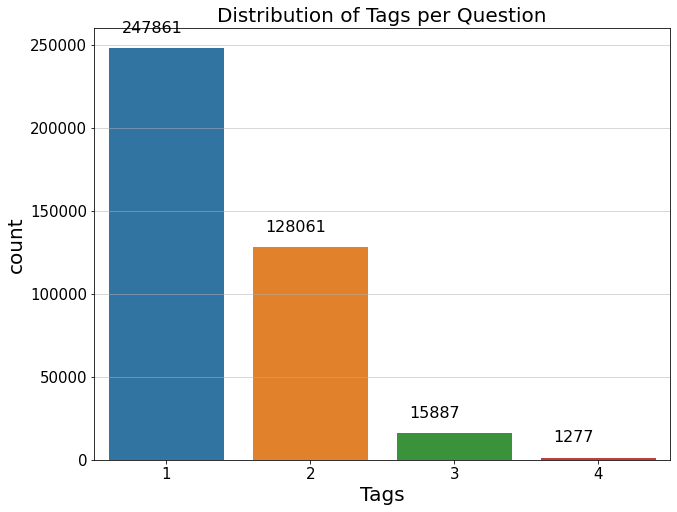

In [83]:
fig = plt.figure(figsize = (8, 6))
axes = fig.add_axes([0.1,0.1,1,1])
axes.set_title("Distribution of Tags per Question", fontsize = 20)
axes.set_xlabel("Tags", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
plt.grid(linestyle='-', linewidth=0.5)
axes.tick_params(labelsize = 15)
sns.countplot(list(trainns['count']), ax = axes)
for i in axes.patches:
    axes.text(i.get_x()+0.09, i.get_height()+9500, str(round(i.get_height(), 2)), fontsize=16, color='black')
plt.show()

 Total number of Unique Tags

In [84]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "))
data_bow = vectorizer.fit_transform(trainns['Tags'])

In [85]:
print("Total number of datapoints = {}".format(data_bow.shape[0]))
print("Total number of unique tags = {}".format(data_bow.shape[1]))

Total number of datapoints = 393086
Total number of unique tags = 153


 Tags Count

In [87]:
col_sum = data_bow.sum(axis = 0).A1 #data_bow.sum(axis = 0) will sum the column of sparse matrix then .A1 will convert that 
                                    #matrix into array.
feat_count = dict(zip(vectorizer.get_feature_names(), col_sum))
feat_count_sorted = dict(sorted(feat_count.items(), key = lambda x: x[1], reverse = True))
count_data = {"Tags":list(feat_count_sorted.keys()), "Count": list(feat_count_sorted.values())}
count_df = pd.DataFrame(data = count_data)
count_df[:25]

,Tags,Count
0,javascript,42955
1,jquery,41892
2,php,40921
3,android,36818
4,c#,28393
5,java,23241
6,html,20537
7,mysql,19792
8,css,17258
9,iphone,14099


 Top Highest occuring Tags

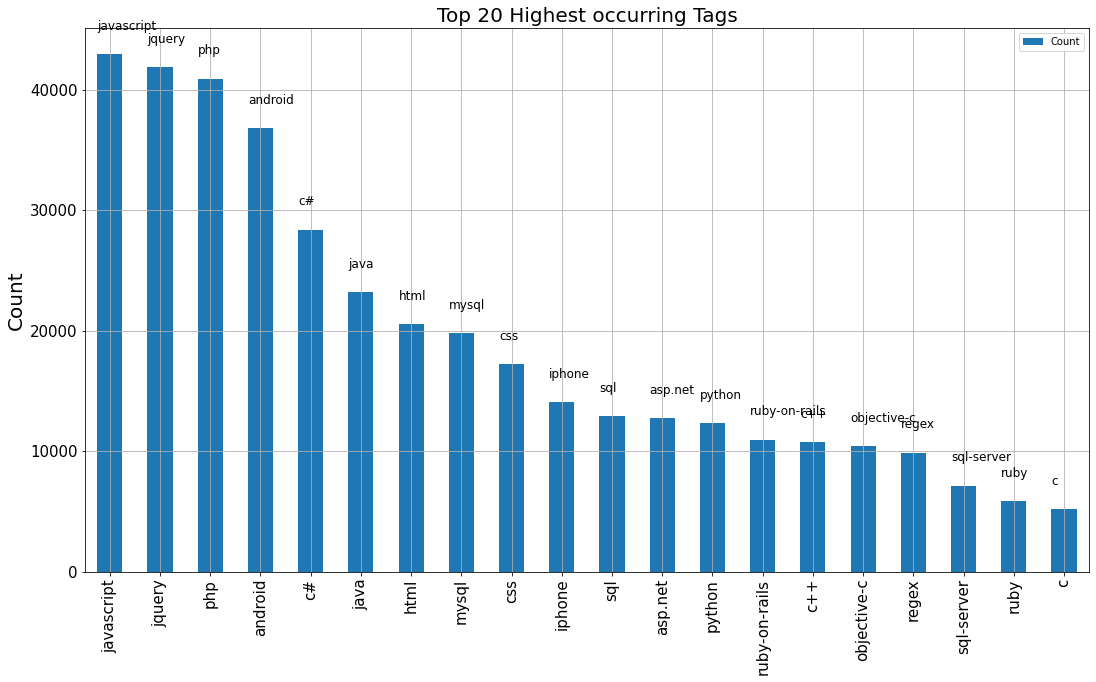

In [88]:
axes = count_df.head(20).plot(x = 'Tags', y = 'Count', kind = 'bar', figsize = (18, 10), fontsize = 15, grid = True)
plt.xlabel("")
plt.ylabel("Count", fontsize = 20)
plt.title("Top 20 Highest occurring Tags", fontsize = 20)
cnt = 0
for i in axes.patches:
    axes.text(i.get_x(), i.get_height()+2000, count_df.head(20)['Tags'][cnt], fontsize=12, color='black')
    cnt +=1

Plotting tag numbers Vs frequency graph

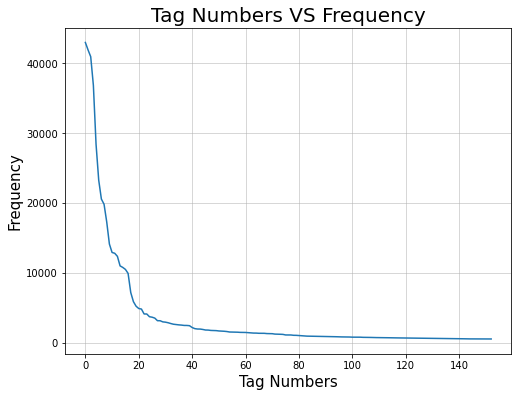

In [89]:
frequency_tags = list(feat_count_sorted.values())
plt.figure(figsize = (8, 6))
plt.plot(frequency_tags)
plt.title("Tag Numbers VS Frequency", fontsize=20)
plt.xlabel("Tag Numbers", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.grid(linestyle='-', linewidth=0.5)

Plotting Quantile Values of tag number Vs frequency plot

<ipython-input-90-e0823678f9cb>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = '({},{})'.format(x, y), xy = (x, y), fontweight='bold', fontsize = 16, xytext=(x-1, y+5500))


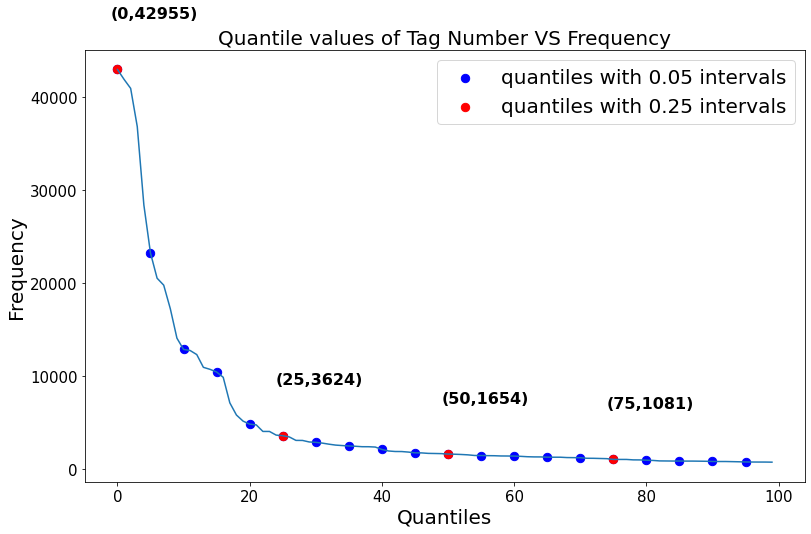

In [90]:
fig = plt.figure(figsize = (10, 6))

axes = fig.add_axes([0.1,0.1,1,1])
axes.set_title("Quantile values of Tag Number VS Frequency", fontsize = 20)
axes.set_xlabel("Quantiles", fontsize = 20)
axes.set_ylabel("Frequency", fontsize = 20)
axes.plot(frequency_tags[0:100])

plt.scatter(x = np.arange(0, 100, 5), y = frequency_tags[0:100][::5], c = "blue", s = 70, label="quantiles with 0.05 intervals")
plt.scatter(x = np.arange(0, 100, 25), y = frequency_tags[0:100][::25], c = "red", s = 70, label="quantiles with 0.25 intervals")
plt.legend(loc='upper right', fontsize = 20)

for x, y in zip(np.arange(0, 100, 25), frequency_tags[0:100][::25]):
    plt.annotate(s = '({},{})'.format(x, y), xy = (x, y), fontweight='bold', fontsize = 16, xytext=(x-1, y+5500))
    
axes.tick_params(labelsize = 15)